# Making a tree diagram

[NetworkX doesn't make interactive graphs by default](https://stackoverflow.com/questions/31580491/python-2-7-networkx-make-it-interactive), but things can be exported to JSON or GEXF and then visualised interactively => try with NetworkX. Could also be possible to [try Plotly](https://plotly.com/python/tree-plots/), but want to ideally avoid a new stack.

**Plot types**:

- Hierarchical options: radial, tree, etc. Hierarchical => Want something hierarchical, not force directed, as then each hierarchy level can correspond to a tracking bucket.
 - [NetworkX hierarchical ex](https://stackoverflow.com/a/29597209)
- Force directed (the classic cloud network, with node proximity determined by weights) - more pretty than functional? Could work as each node being a full tracked link, with node weights determined by parameter similarity (e.g. if mediums are equal, or some metric of similarity)
 - [NetworkX and D3 example](https://andrewmellor.co.uk/blog/articles/2014/12/14/d3-networks/) - shows how this isn't super useful? What would the point cloud tell me
 - [Use Python & Pandas to Create a D3 Force Directed Network Diagram](http://www.austintaylor.io/d3/python/pandas/2016/02/01/create-d3-chart-python-force-directed/)
 - [Example using Python](https://towardsdatascience.com/visualising-graph-data-with-python-igraph-b3cc81a495cf)
 - [How to using CoffeeScript and R](https://flowingdata.com/2012/08/02/how-to-make-an-interactive-network-visualization/)

### An approach

1. Make a hierarchical graph
2. Try and make it interactive
3. Find a way to compile [the link builder](https://britishredcrosssociety.github.io/tracked-link-builder/) into a JSON
4. Merge

### Step 1: any hierarchical graph

Based on [this SO example](https://stackoverflow.com/questions/11479624/is-there-a-way-to-guarantee-hierarchical-output-from-networkx).

Dependencies:

- [installing custom pygraphviz](https://stackoverflow.com/a/55202558) (as the [default](https://anaconda.org/anaconda/pygraphviz) isn't for Windows)
- [running 'dot -c' in anaconda prompt](https://stackoverflow.com/a/60147201)

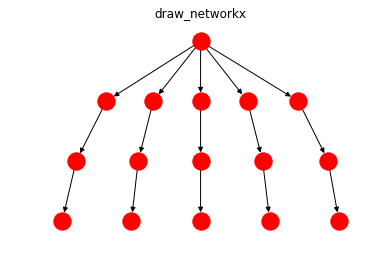

In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
G = nx.DiGraph()

G.add_node("ROOT")

for i in range(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=False, arrows=True)
plt.savefig('nx_test.png')